# Sign Language

### American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well.

In [1]:
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

## Import train and test data

In [2]:
train = pd.read_csv("./archive/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("./archive/sign_mnist_test/sign_mnist_test.csv")

## Train data

In [3]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


## Train Data Shape

In [4]:
train.shape

(27455, 785)

## Test Data

In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


## Test Data Shape

In [6]:
test.shape

(7172, 785)

## Converting categorical data into Numpy array

In [7]:
y_train = train["label"]
X_train = train.drop("label", axis=1)

y_test = test["label"]
X_test = test.drop("label", axis=1)

encode = LabelBinarizer()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

X_train = X_train.values
X_test = X_test.values

In [8]:
X_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [9]:
# scale
X_train = X_train / 255
X_test = X_test / 255

In [10]:
y_train 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [11]:
X_train 

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
X_train.shape

(27455, 28, 28, 1)

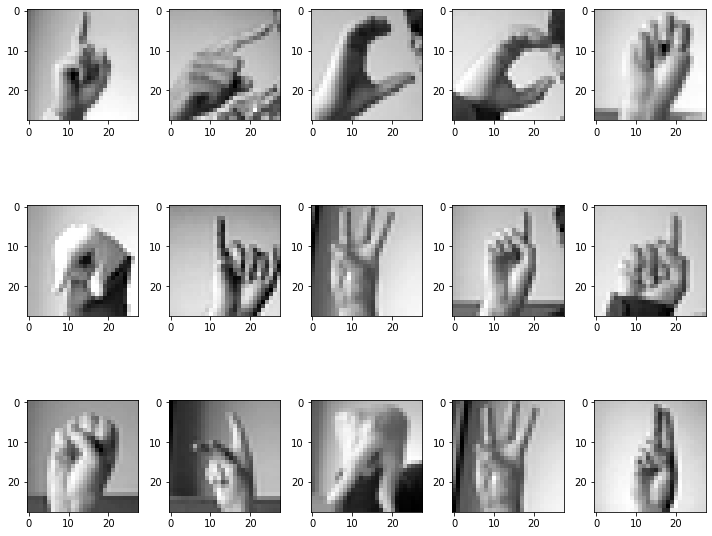

In [14]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

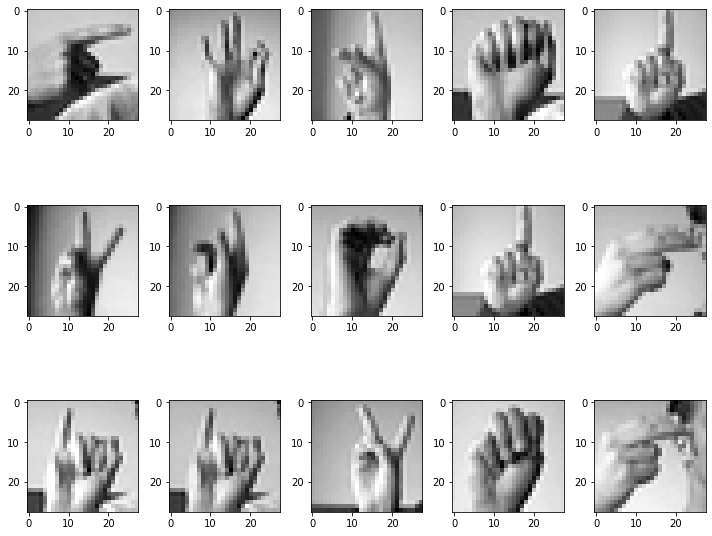

In [15]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(X_test[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

## Data Augmentation

In [16]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.3, 
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode="nearest",
    horizontal_flip=False, 
    vertical_flip=False,
    validation_split=0.0)

datagen.fit(X_train)

# Training

In [17]:
model = Sequential()

model.add(Conv2D(32 , (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , padding = 'same'))

model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = (X_test, y_test))

Epoch 1/20
858/858 [==============================] - 56s 62ms/step - loss: 1.2820 - accuracy: 0.6149 - val_loss: 0.4892 - val_accuracy: 0.8157
Epoch 2/20
858/858 [==============================] - 42s 49ms/step - loss: 0.1573 - accuracy: 0.9468 - val_loss: 0.4639 - val_accuracy: 0.8649
Epoch 3/20
858/858 [==============================] - 39s 45ms/step - loss: 0.0850 - accuracy: 0.9732 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 4/20
858/858 [==============================] - 38s 45ms/step - loss: 0.0627 - accuracy: 0.9789 - val_loss: 0.1089 - val_accuracy: 0.9579
Epoch 5/20
858/858 [==============================] - 44s 51ms/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.1040 - val_accuracy: 0.9668
Epoch 6/20
858/858 [==============================] - 45s 52ms/step - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.3558 - val_accuracy: 0.9032
Epoch 7/20
858/858 [==============================] - 42s 48ms/step - loss: 0.0461 - accuracy: 0.9852 - val_loss: 0.2393 - val_accuracy:

In [18]:
model.evaluate(X_test, y_test, verbose=0)

[0.015183186158537865, 0.993725597858429]

In [19]:
score = model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 0.0152 - accuracy: 0.9937


# Analyze model

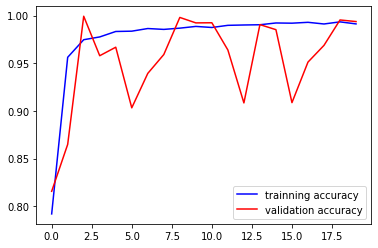

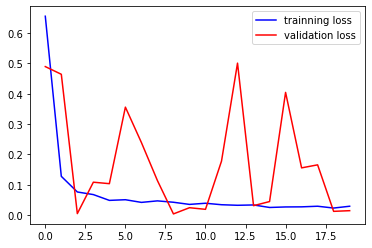

In [20]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_acc, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [21]:
predictions = model.predict_classes(X_test)
for i in range(len(predictions)):
    if predictions[i] >= 9:
        predictions[i] += 1
        
predictions[:10]

/home/sk/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7])

In [22]:
y_test_inv_label = encode.inverse_transform(y_test)
y_test_inv_label

array([ 6,  5, 10, ...,  2,  4,  2])

In [23]:
confusion_matrix(predictions, y_test_inv_label)

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 432,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 310,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 244,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 498,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 247,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 348,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

In [24]:
print(accuracy_score(y_test_inv_label, predictions))

0.9937255995538204


In [25]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
print(classification_report(y_test_inv_label, predictions, target_names=labels))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       1.00      1.00      1.00       432
           C       1.00      1.00      1.00       310
           D       1.00      1.00      1.00       245
           E       1.00      1.00      1.00       498
           F       1.00      1.00      1.00       247
           G       1.00      1.00      1.00       348
           H       0.95      1.00      0.97       436
           I       1.00      1.00      1.00       288
           K       1.00      1.00      1.00       331
           L       1.00      1.00      1.00       209
           M       1.00      1.00      1.00       394
           N       1.00      1.00      1.00       291
           O       1.00      1.00      1.00       246
           P       0.98      1.00      0.99       347
           Q       1.00      1.00      1.00       164
           R       0.96      1.00      0.98       144
           S       1.00    

## Save model

In [26]:
model.save("hand9.model")

INFO:tensorflow:Assets written to: hand9.model/assets


In [37]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (28, 28))
    return new_array.reshape(-1, 28, 28, 1)

model = tf.keras.models.load_model("hand9.model")

# Predictions

# Predict V

In [50]:
prediction = model.predict_classes([prepare("./archive/V2.png")])
print(labels[prediction[0]])

V


# Predict A

In [39]:
prediction = model.predict_classes([prepare("./archive/AAA.png")])
print(labels[prediction[0]])

A


# Predict P

In [40]:
prediction = model.predict_classes([prepare("./archive/P1.jpg")])
print(labels[prediction[0]])

P


# Predict F

In [41]:
prediction = model.predict_classes([prepare("./archive/F1.png")])
print(labels[prediction[0]])

F


# Predict B

In [45]:
prediction = model.predict_classes([prepare("./archive/B1.png")])
print(labels[prediction[0]])

B


# Predict Y

In [48]:
prediction = model.predict_classes([prepare("./archive/Y1.jpg")])
print(labels[prediction[0]])

Y


# Predict L

In [46]:
prediction = model.predict_classes([prepare("./archive/LL.png")])
print(labels[prediction[0]])

L


# Predict C

In [52]:
prediction = model.predict_classes([prepare("./archive/C1.jpg")])
print(labels[prediction[0]])

C


# Predict D

In [54]:
prediction = model.predict_classes([prepare("./archive/D1.jpg")])
print(labels[prediction[0]])

D


# Predict E

In [58]:
prediction = model.predict_classes([prepare("./archive/E1.jpeg")])
print(labels[prediction[0]])

E
